In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sentiments=pd.read_csv('fear_greed_index.csv')
trade=pd.read_csv('historical_data.csv')

In [ ]:
print("Dimensions of Sentiment Table :",sentiments.shape)
print("Dimensions of Trade Table :",trade.shape)

Dimensions of Sentiment Table : (2644, 4)
Dimensions of Trade Table : (211224, 16)


In [ ]:
sentiments.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trade.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
sentiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [ ]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
print("Columns in Sentiment Table are :" , sentiments.columns)

Columns in Sentiment Table are : Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [ ]:
print("Columns in Trade Table are :" , trade.columns)

Columns in Trade Table are : Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [ ]:
print("Statistics of Sentiment Table :")
sentiments.describe()

Statistics of Sentiment Table :


,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [ ]:
print("Statistics of Trade Table :")
trade.describe()

Statistics of Trade Table :


,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [ ]:
print("Null Values in each column of Sentiment Table :",sentiments.isna().sum())

Null Values in each column of Sentiment Table : timestamp         0
value             0
classification    0
date              0
dtype: int64


In [ ]:
print("Null Values in each column of trade Table :",trade.isna().sum())

Null Values in each column of trade Table : Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [ ]:

sentiments['sentiment_datetime'] = pd.to_datetime(
    sentiments['timestamp'],
    unit='s'
)


sentiments['join_date'] = sentiments['sentiment_datetime'].dt.date


In [ ]:
sentiments.head(3)

,timestamp,value,classification,date,sentiment_datetime,join_date
0,1517463000,30,Fear,2018-02-01,2018-02-01 05:30:00,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02 05:30:00,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03 05:30:00,2018-02-03


In [ ]:

trade['trade_datetime'] = pd.to_datetime(
    trade['Timestamp'],
    unit='ms'
)
trade['join_date'] = trade['trade_datetime'].dt.date


In [ ]:
trade.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_datetime,join_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [ ]:
report= pd.merge(
    trade,
    sentiments[['join_date', 'classification', 'value']],
    on='join_date',
    how='left'
)


In [ ]:
report.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_datetime,join_date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0


In [ ]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [ ]:
report.shape

(211224, 20)

In [ ]:
report.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
def filter_trades_with_sentiment(report):
    df= report[report['classification'].notna()].copy()
    return df


In [ ]:
df=filter_trades_with_sentiment(report)

In [ ]:
df['classification'].value_counts()

,count
classification,
Fear,133871
Greed,36289
Neutral,7141
Extreme Greed,6962


In [ ]:
df.head(1)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_datetime,join_date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.0,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0


In [ ]:
def add_trade_result_column(df):
    df = df.copy()
    df['trade_result'] = df['Closed PnL'].apply(
        lambda x: 'Win' if x > 0 else ('Loss' if x < 0 else 'Breakeven')
    )
    return df


In [ ]:
df=add_trade_result_column(df)

In [ ]:
df['trade_result'].value_counts()

,count
trade_result,
Breakeven,93508
Win,77455
Loss,13300


In [ ]:
def simplify_sentiment(df):
    df = df.copy()  # avoid unintended side effects
    df['classification'] = df['classification'].replace({
        'Extreme Fear': 'Fear',
        'Fear': 'Fear',
        'Greed': 'Greed',
        'Extreme Greed': 'Greed'
    })

    return df


In [ ]:
df=simplify_sentiment(df)

In [ ]:
df['classification'].value_counts()

,count
classification,
Fear,133871
Greed,43251
Neutral,7141


In [ ]:
def add_risk_proxy(df):


    df = df.copy()
    df['risk_proxy'] = df['Size USD']

    return df


In [ ]:
df=add_risk_proxy(df)

In [ ]:
df.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,trade_datetime,join_date,classification,value,trade_result,risk_proxy
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0,Breakeven,7872.16
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,Greed,74.0,Breakeven,127.68


In [ ]:
def average_pnl_by_sentiment(df,
                             sentiment_col='classification',
                             pnl_col='Closed PnL'):


    avg_pnl = (
        df
        .groupby(sentiment_col)[pnl_col]
        .mean()
        .reset_index()
        .rename(columns={pnl_col: 'average_closedPnL'})
    )

    return avg_pnl


In [ ]:
avg_pnl_df = average_pnl_by_sentiment(df)


In [ ]:
avg_pnl_df

,classification,average_closedPnL
0,Fear,50.047622
1,Greed,77.838247
2,Neutral,22.229713


In [ ]:
def trade_frequency_by_sentiment(df, sentiment_col='classification'):


    trade_freq = (
        df
        .groupby(sentiment_col)
        .size()
        .reset_index(name='trade_count')
    )

    return trade_freq


In [ ]:
trade_freq_df = trade_frequency_by_sentiment(df)


In [ ]:
trade_freq_df

,classification,trade_count
0,Fear,133871
1,Greed,43251
2,Neutral,7141


In [ ]:
def average_risk_by_sentiment(df,
                              sentiment_col='classification',
                              risk_col='risk_proxy'):


    avg_risk = (
        df
        .groupby(sentiment_col)[risk_col]
        .mean()
        .reset_index()
        .rename(columns={risk_col: 'average_risk'})
    )

    return avg_risk


In [ ]:
avg_risk_df = average_risk_by_sentiment(df)


In [ ]:
avg_risk_df

,classification,average_risk
0,Fear,5259.977837
1,Greed,3581.661513
2,Neutral,3058.848110


In [ ]:
def trader_behavior_by_sentiment(df,
                                 trader_col='Account',
                                 sentiment_col='classification',
                                 pnl_col='Closed PnL',
                                 risk_col='risk_proxy'):


    behavior_df = (
        df
        .groupby([trader_col, sentiment_col])
        .agg(
            avg_pnl=(pnl_col, 'mean'),
            avg_risk=(risk_col, 'mean'),
            trade_count=(pnl_col, 'count')
        )
        .reset_index()
    )

    return behavior_df


In [ ]:
trader_behavior_df = trader_behavior_by_sentiment(df)


In [ ]:
trader_behavior_df

,Account,classification,avg_pnl,avg_risk,trade_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,574.414696,16345.241940,3356
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,-708.887230,14810.891818,462
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,4.839719,1693.351684,3533
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,64.398269,2492.749906,320
4,0x271b280974205ca63b716753467d5a371de622ab,Fear,26.382859,10836.900968,1136
...,...,...,...,...,...
64,0xbaaaf6571ab7d571043ff1e313a9609a10637864,Fear,44.367967,3210.775186,21190
65,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,Fear,147.192210,8103.972913,2211
66,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,Greed,43.714157,2725.780599,267
67,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,Fear,4.764098,1554.837334,26651


In [ ]:
def win_loss_by_sentiment(df,
                          sentiment_col='classification',
                          result_col='trade_result'):



    counts = (
        df
        .groupby([sentiment_col, result_col])
        .size()
        .reset_index(name='trade_count')
    )


    counts['percentage'] = (
        counts['trade_count'] /
        counts.groupby(sentiment_col)['trade_count'].transform('sum')
    ) * 100

    return counts


In [ ]:
win_loss_df = win_loss_by_sentiment(df)


In [ ]:
win_loss_df

,classification,trade_result,trade_count,percentage
0,Fear,Breakeven,69335,51.792397
1,Fear,Loss,8960,6.693010
2,Fear,Win,55576,41.514592
3,Greed,Breakeven,19844,45.881020
4,Greed,Loss,3793,8.769739
5,Greed,Win,19614,45.349240
6,Neutral,Breakeven,4329,60.621762
7,Neutral,Loss,547,7.659992
8,Neutral,Win,2265,31.718247


In [ ]:
def trader_behavior_by_sentiment(df,
                                 trader_col='Account',
                                 sentiment_col='classification',
                                 pnl_col='Closed PnL',
                                 risk_col='risk_proxy'):


    behavior_df = (
        df
        .groupby([trader_col, sentiment_col])
        .agg(
            avg_pnl=(pnl_col, 'mean'),
            avg_risk=(risk_col, 'mean'),
            trade_count=(pnl_col, 'count')
        )
        .reset_index()
    )

    return behavior_df


In [ ]:
trader_behavior_df = trader_behavior_by_sentiment(df)


In [ ]:
trader_behavior_df

,Account,classification,avg_pnl,avg_risk,trade_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,574.414696,16345.241940,3356
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,-708.887230,14810.891818,462
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,4.839719,1693.351684,3533
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,64.398269,2492.749906,320
4,0x271b280974205ca63b716753467d5a371de622ab,Fear,26.382859,10836.900968,1136
...,...,...,...,...,...
64,0xbaaaf6571ab7d571043ff1e313a9609a10637864,Fear,44.367967,3210.775186,21190
65,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,Fear,147.192210,8103.972913,2211
66,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,Greed,43.714157,2725.780599,267
67,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,Fear,4.764098,1554.837334,26651


In [ ]:
def volatility_by_sentiment(df,
                            sentiment_col='classification',
                            pnl_col='Closed PnL',
                            risk_col='risk_proxy'):


    volatility_df = (
        df
        .groupby(sentiment_col)
        .agg(
            pnl_volatility=(pnl_col, 'std'),
            risk_volatility=(risk_col, 'std')
        )
        .reset_index()
    )

    return volatility_df


In [ ]:
volatility_df = volatility_by_sentiment(df)


In [ ]:
volatility_df

,classification,pnl_volatility,risk_volatility
0,Fear,909.121796,30811.757953
1,Greed,1059.262203,11478.535320
2,Neutral,633.704815,8132.572825


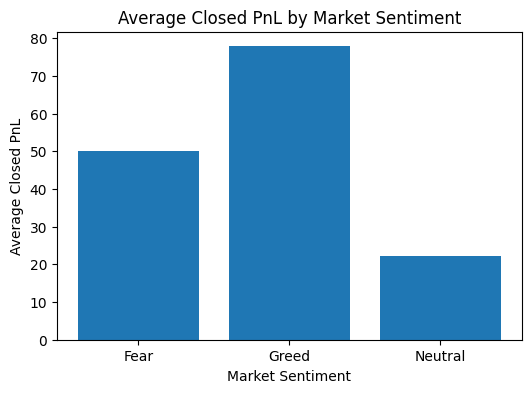

In [ ]:
avg_pnl_df = average_pnl_by_sentiment(df)
plt.figure(figsize=(6,4))
plt.bar(avg_pnl_df['classification'], avg_pnl_df['average_closedPnL'])
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.show()

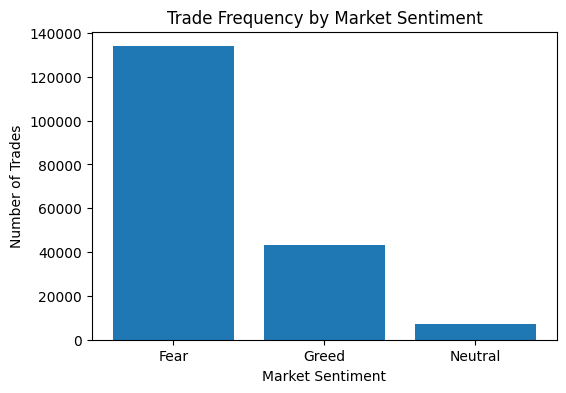

In [ ]:
trade_freq_df = trade_frequency_by_sentiment(df)

plt.figure(figsize=(6,4))
plt.bar(trade_freq_df['classification'], trade_freq_df['trade_count'])
plt.title('Trade Frequency by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.show()


<Figure size 600x400 with 0 Axes>

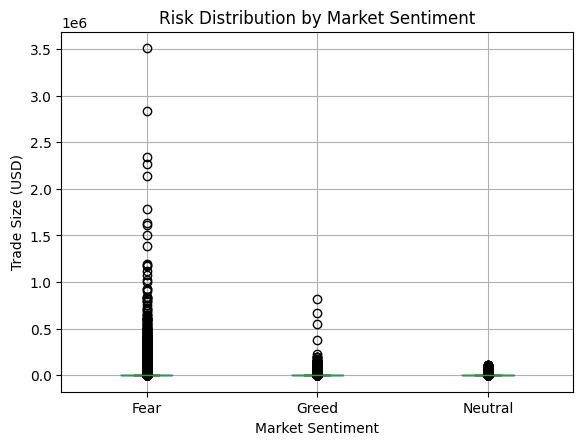

In [ ]:
plt.figure(figsize=(6,4))
df.boxplot(column='risk_proxy', by='classification')
plt.title('Risk Distribution by Market Sentiment')
plt.suptitle('')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Size (USD)')
plt.show()


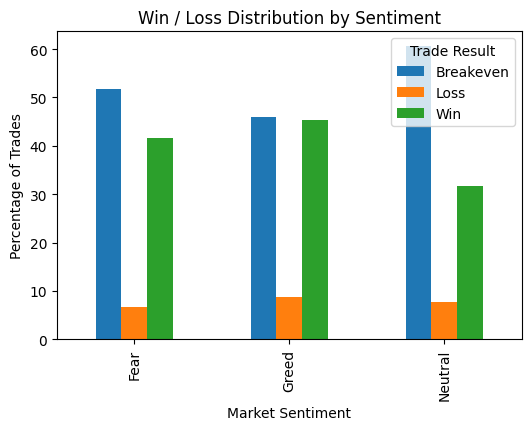

In [ ]:
win_loss_df = win_loss_by_sentiment(df)

pivot_df = win_loss_df.pivot(
    index='classification',
    columns='trade_result',
    values='percentage'
)

pivot_df.plot(kind='bar', figsize=(6,4))
plt.title('Win / Loss Distribution by Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Percentage of Trades')
plt.legend(title='Trade Result')
plt.show()


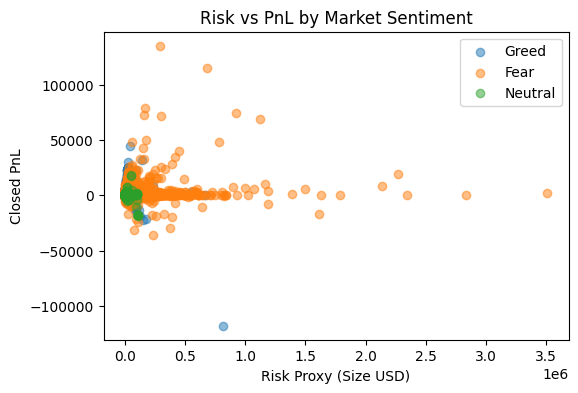

In [ ]:
plt.figure(figsize=(6,4))

for sentiment in df['classification'].unique():
    subset = df[df['classification'] == sentiment]
    plt.scatter(subset['risk_proxy'], subset['Closed PnL'], label=sentiment, alpha=0.5)

plt.title('Risk vs PnL by Market Sentiment')
plt.xlabel('Risk Proxy (Size USD)')
plt.ylabel('Closed PnL')
plt.legend()
plt.show()



<Figure size 600x400 with 0 Axes>

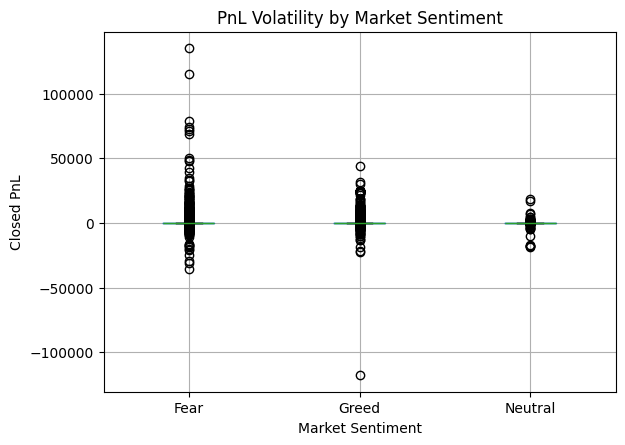

In [ ]:
plt.figure(figsize=(6,4))
df.boxplot(column='Closed PnL', by='classification')
plt.title('PnL Volatility by Market Sentiment')
plt.suptitle('')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.show()
